### Importing libraries

In [18]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import plotly.express as px


### Reading the csv file

In [2]:
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.info() # check the dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
# check if there's any missing and nan values
df.isnull().sum() 

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [5]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### EDA 

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [8]:
# Selecting only numerical columns
X = df.select_dtypes('number').copy()
X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


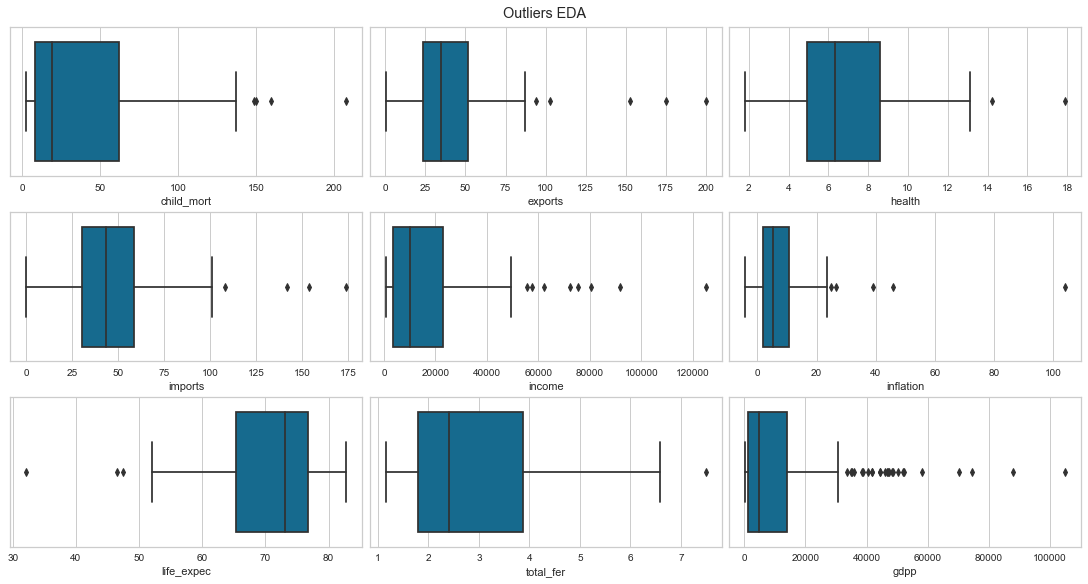

In [9]:
fig, ax = plt.subplots(3,3, figsize=(15,8), constrained_layout=True)
plt.suptitle("Outliers EDA")
ax=ax.flatten()

for x, i in enumerate(X):
    sns.boxplot(x=df[i], ax=ax[x])

### Analysis
The plots indicates that outliers exists in  child_mort, exports, imports, income, gdpp features. <br>
However these outliers is not harmful since they belong to each country. Without these outliers we cant expect the values to be normally distrubuted.

### OBSERVATION

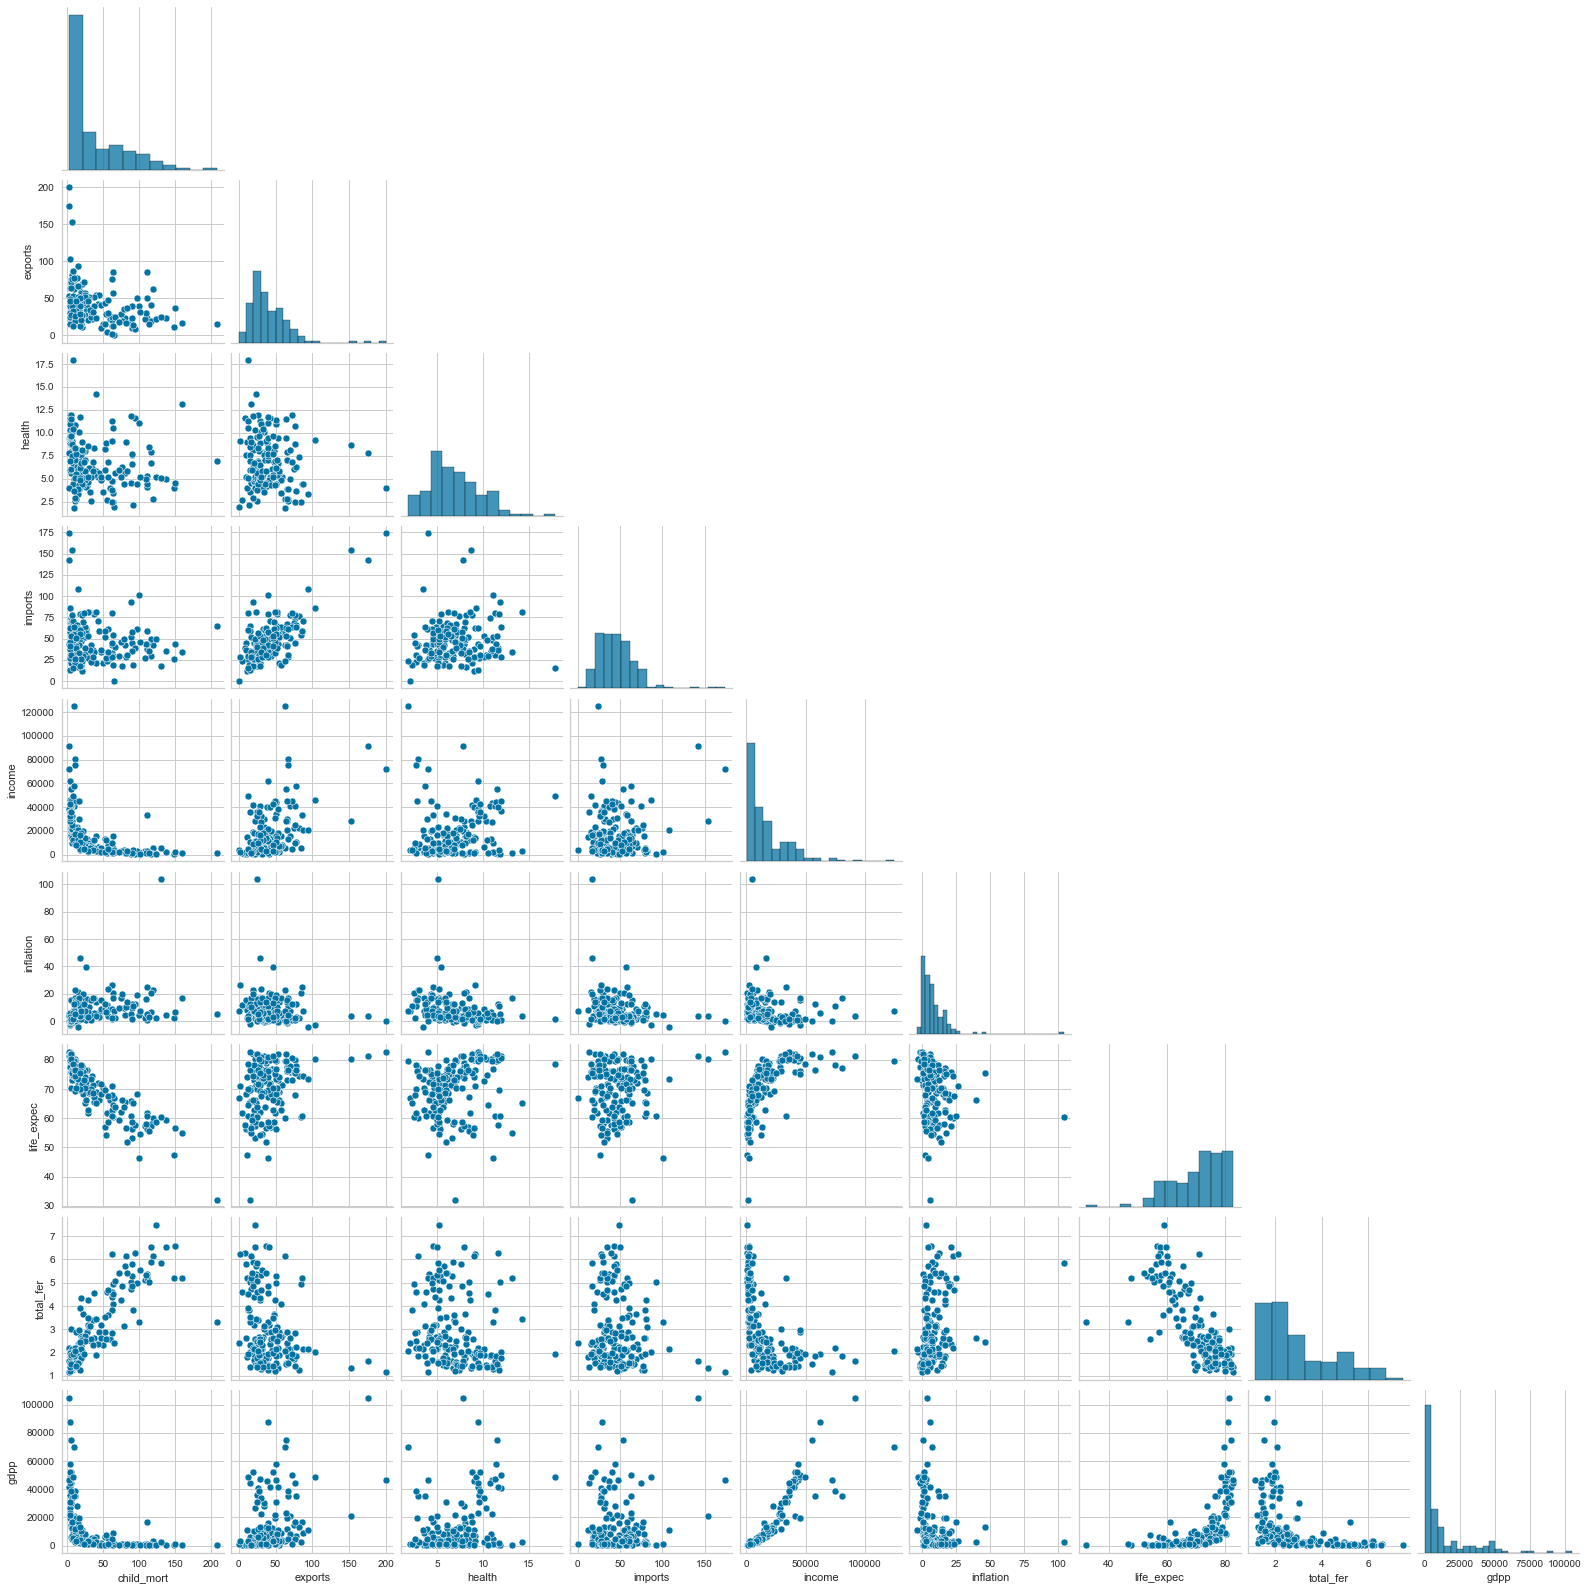

In [11]:
sns.pairplot(data=df, corner=True)

<AxesSubplot:>

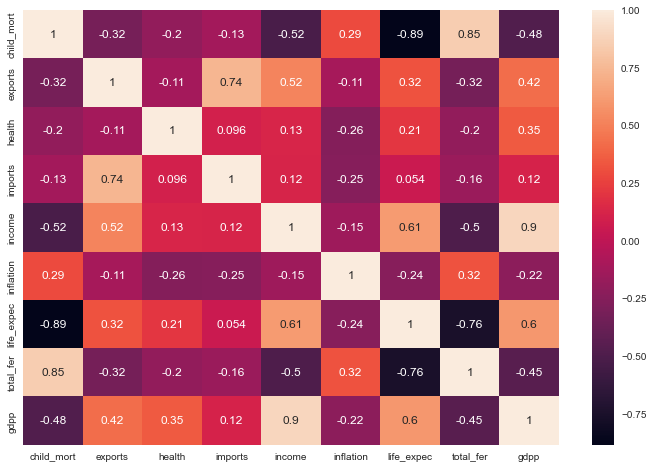

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(X.corr(), annot=True)


* Child_mort has negative relationship with GDP 
* Export, Income, Income has postivite relationship with GDP.
* Total_fer and child_mort has postive relationship.
* total_fer and life_expec has negative relationship.
* life_expec and childe_mort has negative relationship.

# Data preparation

In [15]:
# DataFrame contaning only numerical values
X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Finding our k-means 

In [16]:
scaler = StandardScaler() 

cluster = KMeans()

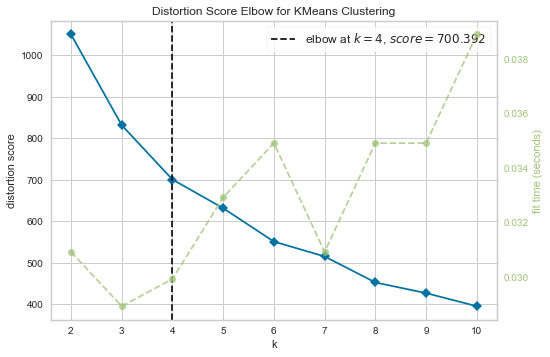

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
pipe = make_pipeline(scaler, KElbowVisualizer(cluster))
pipe.fit(X)
pipe[1].show()

### Pipe / Model building 

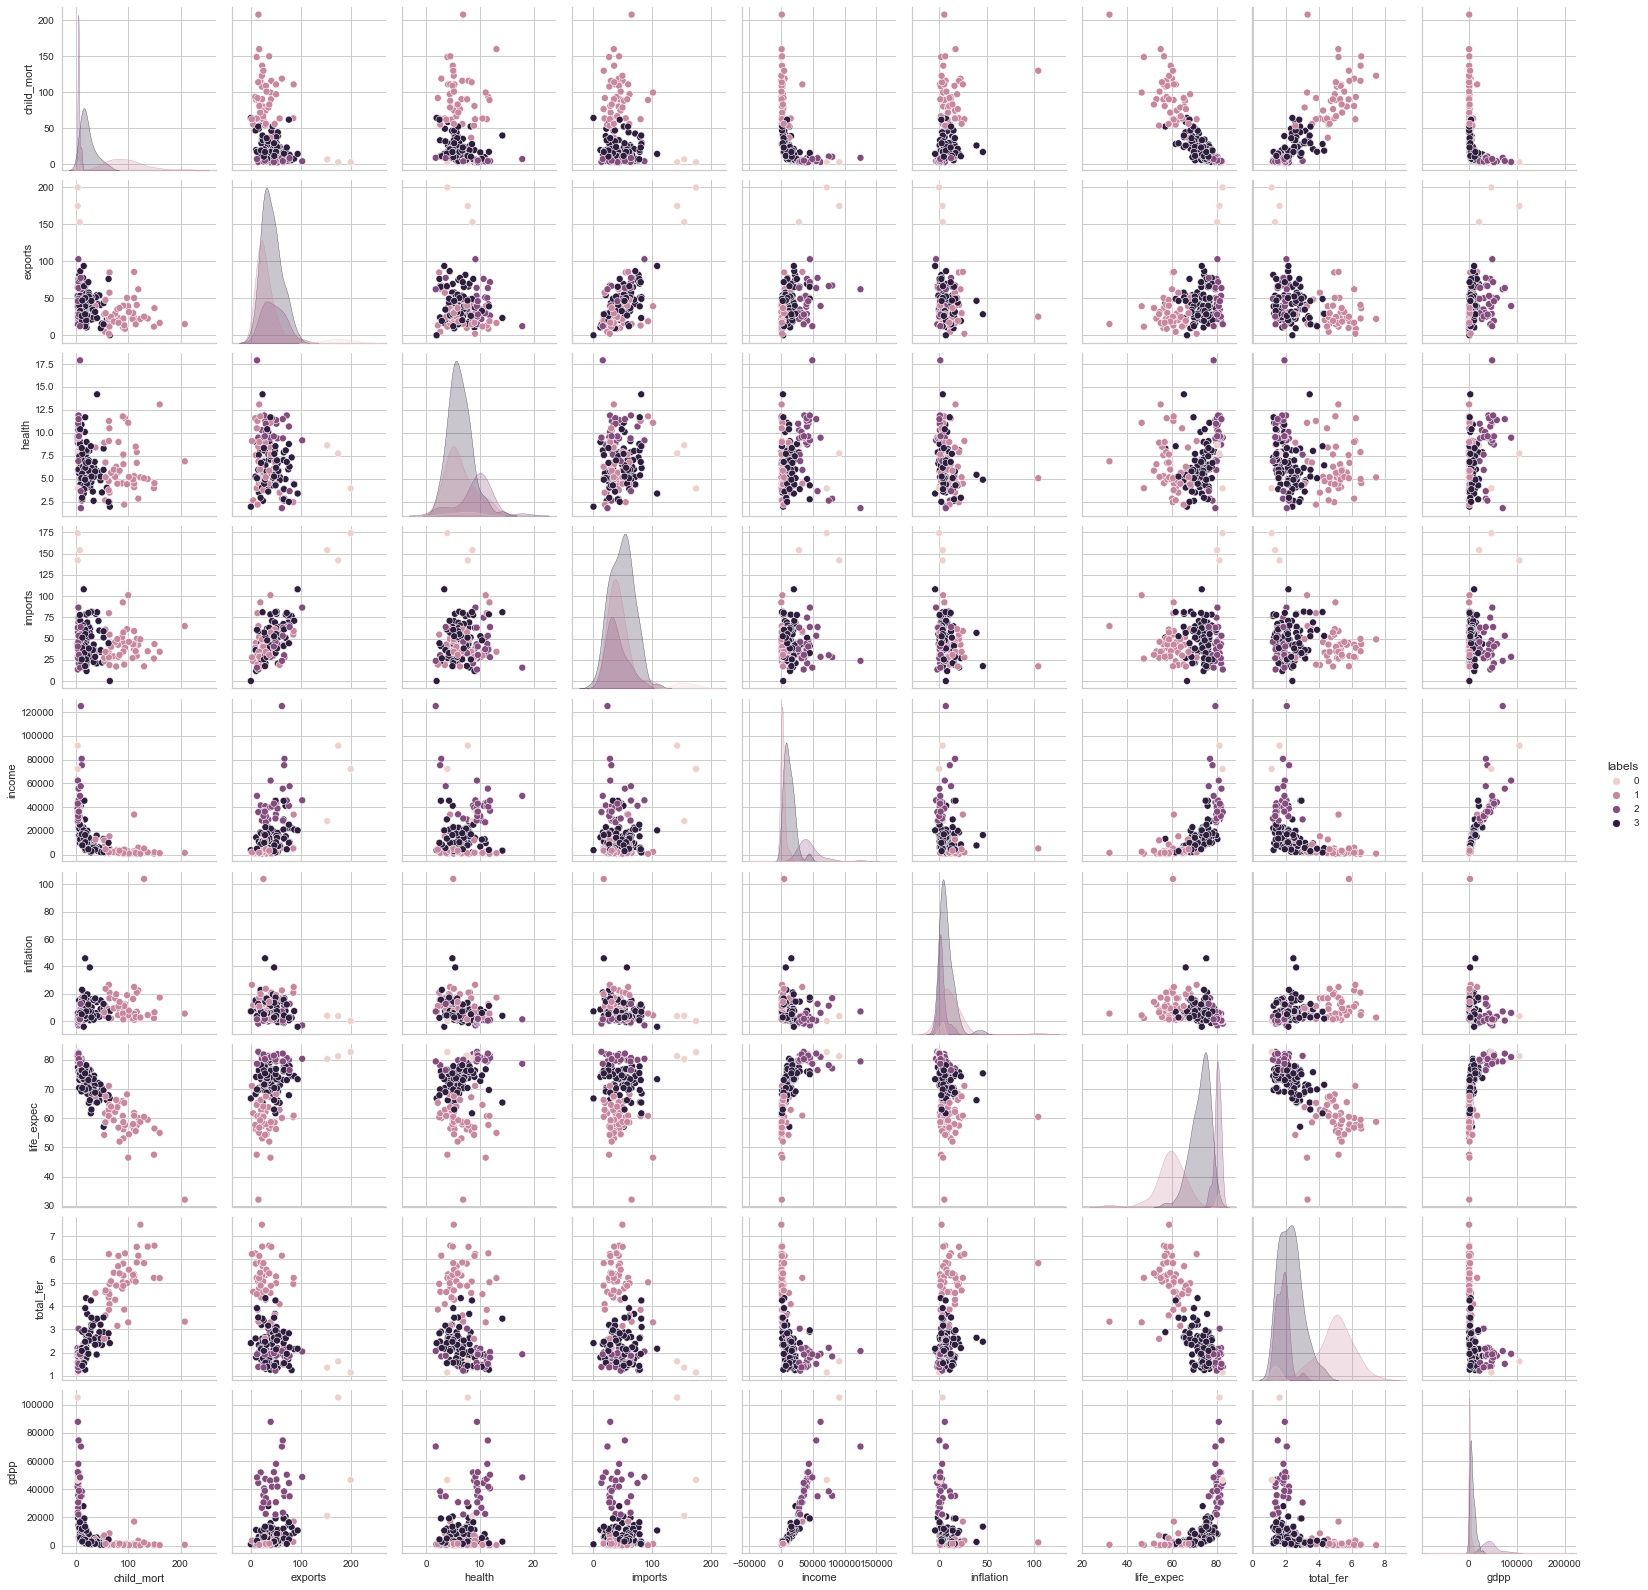

In [28]:

# creating a pipe
pipe = make_pipeline(StandardScaler(), KMeans(n_clusters = 4))
                     
# fit the data to the model
pipe.fit(X)

# add the clusters to the DataFrame 
df_copy = df.copy()
df_copy['labels'] = pipe['kmeans'].labels_

# display the clusters in a pairplot
sns.pairplot(df_copy, hue='labels')

In [30]:
# Analysis:
# Its hard to interpret with n_cluster = 4, the data is too spread. Lets try to interpret the data with n_cluster = 3 

In [37]:
cluster = KMeans(n_clusters=4)
pipe = make_pipeline(StandardScaler(), cluster)